11 ноября 1821 – 9 февраля 1881 гг.

1846 — Двойник
1855 — На первое июля 1855 года
1865 - Преступление и наказание
1870—1872 — Бесы
1875— Подросток
1880 — Пушкин

In [1]:
import nltk
import nltk.tokenize
import timeit
import spacy
import string
from spacy.lang.ru.examples import sentences
from spacy.lang.ru import Russian
import pandas as pd
import numpy as np
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer
# from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from collections import Counter


In [13]:
nltk.download('averaged_perceptron_tagger_ru')

[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     C:\Users\linax\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_ru is already up-to-
[nltk_data]       date!


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\linax\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
%matplotlib inline

In [5]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install -r https://github.com/bureaucratic-labs/dostoevsky/raw/main/requirements-dostoevsky.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: 404 Client Error: Not Found for url: https://github.com/bureaucratic-labs/dostoevsky/raw/main/requirements-dostoevsky.txt


In [7]:
nltk.downloader.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\linax\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

text = "Я люблю маму"
pred = "Haters gonna hate!"
print(analyze_sentiment(pred))
print(analyze_sentiment(text))

#RNC нужно найти


{'neg': 0.878, 'neu': 0.122, 'pos': 0.0, 'compound': -0.8016}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [5]:
from textblob import TextBlob
sent = "I love Python!"
blob = TextBlob(sent)
print(blob.sentiment.polarity)
text = "Я люблю питон"
bl = TextBlob(text)
print(bl.sentiment.polarity)
#без русского нынче


0.625
0.0


Функции для работы с текстами

In [14]:


def read_file(file_name):
    file = open(file_name, 'r').read()
    return file


def info_from_book(file: str):
    word = nltk.WordPunctTokenizer() 
    a = word.tokenize(file)
    morph = MorphAnalyzer()
    token = [morph.normal_forms(el)[0] for el in a]                        #лемматизация - приведение к начальной форме   
    dop = '\n\xa0«»–\t—…'                                                              
    spec_chars = string.punctuation + dop                               #заношу в переменную все знаки преписания и специальные символы, чтобы почистить текст
    exclude = str.maketrans('', '', spec_chars)
    tokens_ = [x for x in [t.translate(exclude) for t in token] if len(x) > 0]
    # print(tokens_)
    tagged = nltk.pos_tag(tokens_)                                        #Где ‘DT’ — это артикль, ‘JJ’ — это прилагательное, ‘NN’ — это существительное, ‘VBZ’ — это глагол в третьем лице единственного числа настоящего времени, ‘IN’ — это предлог,
    counts = Counter(tag for word,tag in tagged)
    print(counts)
    total = sum(counts.values())
    statistic = dict((word, float(count)/total) for word,count in counts.items())
    print(statistic)

    lexical_diversity = (len(set(tokens_)) / len(tokens_)) * 100                                 #лексическое разнообразие
    print('Лексическое разнообразие: ', lexical_diversity)

    words = set(tokens_) 
    word_chars = [len(word) for word in words]
    mean_word_len = sum(word_chars) / float(len(word_chars))                                #средняя длина слов
    print('Средняя длина слова: ', mean_word_len)

    sentences = nltk.sent_tokenize(file)                                                     #средняя длина предложения
    sentence_word_length = [len(sent.split()) for sent in sentences]
    mean_sentence_len = np.mean(sentence_word_length)
    print('Средняя длина предложения: ', mean_sentence_len)

    fdist = nltk.probability.FreqDist(nltk.Text(a))                                    #как часто возникает запятая, например, на 1000 символов
    commas_per_thousand = (fdist[","] * 1000) / fdist.N()                              #проверка других знаков препинания
    semicolon_per_thousand = (fdist[";"] * 1000) / fdist.N()
    dash_per_thousand = (fdist["—"] * 1000) / fdist.N()
    tire_per_thousand =  (fdist["-"] * 1000) / fdist.N()
    colon_per_thousand = (fdist[":"] * 1000) / fdist.N()
    other_dash_per_thousand = (fdist["–"] * 1000) / fdist.N()                         #испотльзуется только как знак препинания в стихотворении На ервое июля ( не явлется марекром прямой речи)
    print('Запятых на 1000 символов: ', commas_per_thousand)
    print('Двоеточий на 1000 символов: ', colon_per_thousand)
    print('Дефис на 1000 символов: ', dash_per_thousand)
    print('Аналог-дефис на 1000 символов: ', other_dash_per_thousand)
    print('Тире на 1000 символов: ', tire_per_thousand)
    print('Точек с запятой на 1000 символов: ', semicolon_per_thousand)

    #мысли, буду в среднем делить число на 2, так как обычно есть открывающая и закрывающая кавычка, если в ПР будут включены комментарии, то их проигнориую.
    thought = (fdist['"'] * 1000) / fdist.N() / 2
    print('Двойных кавычек на 1000 символов: ', thought)
    if thought > dash_per_thousand and dash_per_thousand != 0 or thought > tire_per_thousand and tire_per_thousand != 0:
        print('В ткесте больше размышлений персонажа')
    elif thought < dash_per_thousand or thought < tire_per_thousand:
        print('В тексте больше диалогов')

    
    # Чаще всего употребляемые слова
    more = ['это', 'всё', 'твой', 'свой', 'ещё', 'ваш']                               #для эксперимента добавляю ещё некоторые слова, которые не включены в изначальный список stopwords
    stop = stopwords.words('russian')  + more
    cleaned_tokens = [word for word in tokens_ if not  word in stop]
    fdist_words = FreqDist(cleaned_tokens)
    print('Чаще всего встречаемые слова: ', fdist_words.most_common(5))
    fdist_words.plot(30,cumulative=False)

    #облако слов
    text_raw = " ".join(cleaned_tokens)
    wordcloud = WordCloud().generate(text_raw)
    plt.imshow(wordcloud) 
    plt.axis("off")


Counter({'NNP': 49399, 'NN': 25, 'CD': 15, 'JJ': 14, 'VBD': 9, 'VBZ': 5, 'VBP': 2, 'NNS': 1})
{'JJ': 0.00028299979785728727, 'NNP': 0.998564786739438, 'NN': 0.000505356781888013, 'VBP': 4.0428542551041034e-05, 'VBD': 0.00018192844147968466, 'CD': 0.00030321406913280777, 'VBZ': 0.00010107135637760258, 'NNS': 2.0214271275520517e-05}
Лексическое разнообразие:  11.243177683444513
Средняя длина слова:  7.989212513484358
Средняя длина предложения:  17.16988950276243
Запятых на 1000 символов:  123.8239195483851
Двоеточий на 1000 символов:  1.9434247462751026
Дефис на 1000 символов:  22.842952771693863
Аналог-дефис на 1000 символов:  0.0
Тире на 1000 символов:  18.925255267298024
Точек с запятой на 1000 символов:  8.31353919239905
Двойных кавычек на 1000 символов:  0.0
В тексте больше диалогов
Чаще всего встречаемые слова:  [('господин', 877), ('голядкина', 858), ('наш', 243), ('весь', 214), ('человек', 210)]


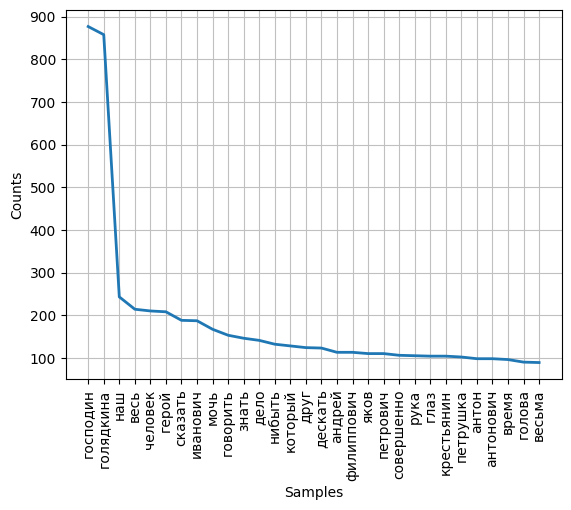

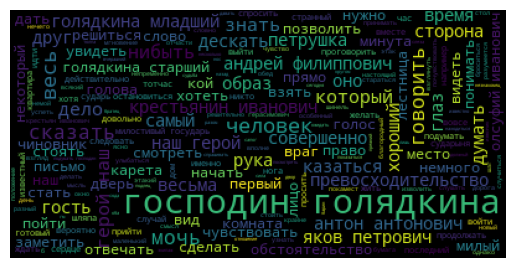

In [8]:
d = read_file("Dvoynik.txt")

info_from_book(d)


Counter({'NNP': 681, 'JJ': 1, 'CD': 1, 'NN': 1})
{'JJ': 0.0014619883040935672, 'NNP': 0.9956140350877193, 'CD': 0.0014619883040935672, 'NN': 0.0014619883040935672}
Лексическое разнообразие:  48.53801169590643
Средняя длина слова:  6.087349397590361
Средняя длина предложения:  15.636363636363637
Запятых на 1000 символов:  128.9198606271777
Двоеточий на 1000 символов:  0.0
Дефис на 1000 символов:  0.0
Аналог-дефис на 1000 символов:  4.645760743321719
Тире на 1000 символов:  0.0
Точек с запятой на 1000 символов:  11.614401858304298
Двойных кавычек на 1000 символов:  0.0
Чаще всего встречаемые слова:  [('сердце', 9), ('простить', 8), ('сметь', 7), ('час', 5), ('великий', 5)]


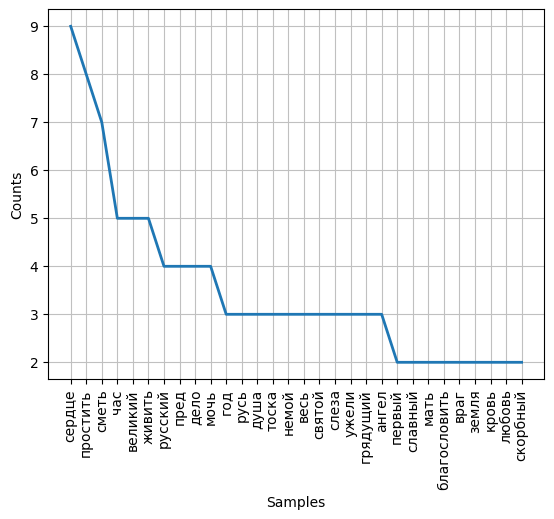

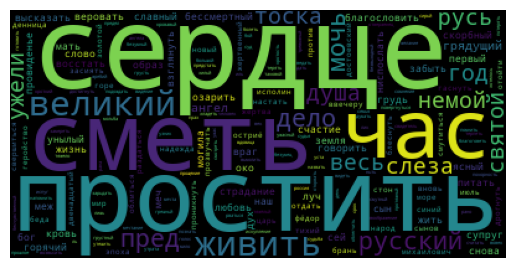

In [7]:
p = read_file("na_pervoe.txt")
info_from_book(p)

Counter({'NNP': 194256, 'CD': 1551, 'VBD': 611, 'NN': 515, 'JJ': 482, 'FW': 85, '$': 24, 'VBP': 22, 'VBZ': 18, 'NNS': 8, 'IN': 8, 'RB': 7, 'MD': 6, 'VB': 6, 'DT': 5, 'JJS': 3, 'PRP': 1})
{'JJ': 0.002439172503137525, 'NNP': 0.9830371240030767, 'NN': 0.002606169790696733, 'VBP': 0.00011133152503947209, 'VBD': 0.0030919800817780655, 'CD': 0.007848872515282782, 'NNS': 4.048419092344439e-05, 'VBZ': 9.108942957774989e-05, 'DT': 2.5302619327152746e-05, 'FW': 0.0004301445285615967, 'IN': 4.048419092344439e-05, 'JJS': 1.5181571596291648e-05, 'RB': 3.542366705801384e-05, 'MD': 3.0363143192583296e-05, 'VB': 3.0363143192583296e-05, '$': 0.00012145257277033319, 'PRP': 5.060523865430549e-06}
Лексическое разнообразие:  6.931905590866766
Средняя длина слова:  8.104394802160899
Средняя длина предложения:  12.912329296573049
Запятых на 1000 символов:  104.69634471502052
Двоеточий на 1000 символов:  4.0129804482962195
Дефис на 1000 символов:  0.0
Аналог-дефис на 1000 символов:  0.0
Тире на 1000 символов:

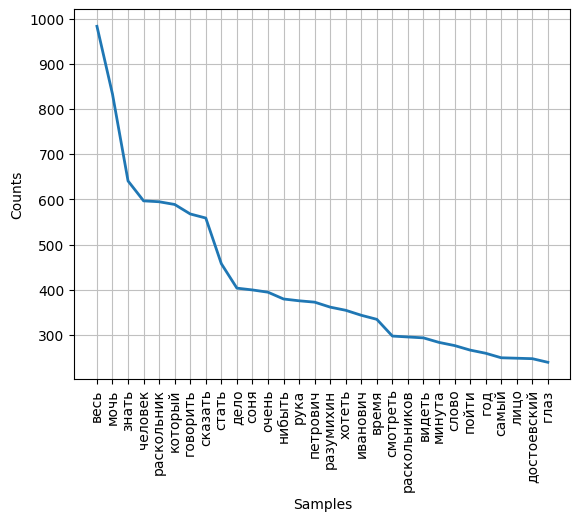

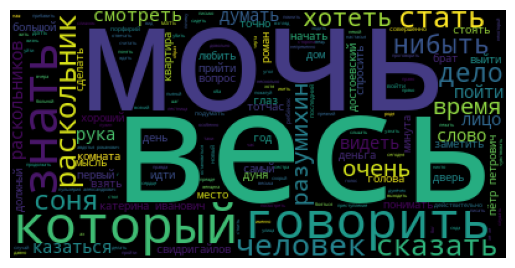

In [9]:
pre = read_file("prestuplenie-i-nakazanie.txt")
info_from_book(pre)

In [15]:
sentiment = analyze_sentiment(p)
print(sentiment) 
#анализ тональности русского языкка не определяется

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


Counter({'NNP': 196398, 'NN': 1469, 'CD': 602, 'FW': 520, 'JJ': 389, 'VBP': 117, 'NNS': 114, 'VBZ': 89, 'VBD': 86, 'VB': 78, 'IN': 74, 'MD': 69, 'JJS': 57, 'RB': 22, 'PRP': 21, 'DT': 18, 'CC': 14, '$': 9, 'VBN': 3, 'RP': 2, 'JJR': 1})
{'JJ': 0.00194352292257884, 'NNP': 0.9812442543666813, 'VBD': 0.0004296734481793837, 'CD': 0.003007714137255686, 'NN': 0.00733942203925017, 'VBP': 0.0005845557376393941, 'IN': 0.00036971901354970223, 'DT': 8.993165194452216e-05, 'VBZ': 0.00044466205683680405, 'FW': 0.0025980255006195292, 'NNS': 0.0005695671289819737, 'CC': 6.994684040129502e-05, 'MD': 0.00034473799912066827, 'VB': 0.0003897038250929294, 'RB': 0.00010991646348774932, 'JJS': 0.0002847835644909869, '$': 4.496582597226108e-05, 'PRP': 0.00010492026060194252, 'VBN': 1.498860865742036e-05, 'JJR': 4.996202885806787e-06, 'RP': 9.992405771613574e-06}
Лексическое разнообразие:  6.656940725048963
Средняя длина слова:  8.109051335935154
Средняя длина предложения:  14.077373570345873
Запятых на 1000 си

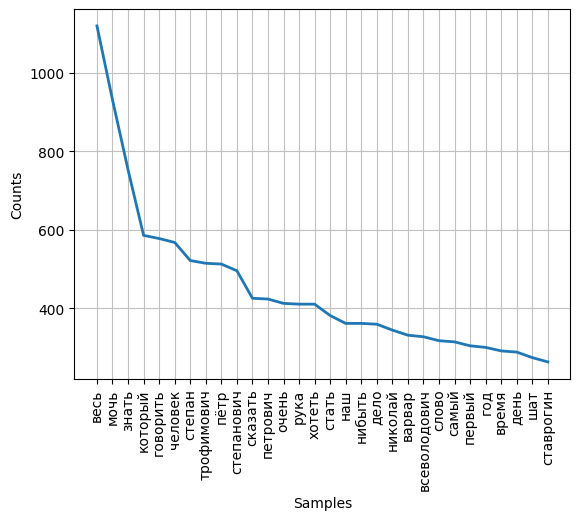

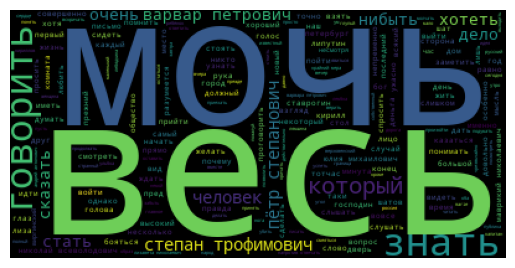

In [15]:
b = read_file("besy.txt")
info_from_book(b)

Counter({'NNP': 189054, 'FW': 1373, 'NN': 881, 'CD': 372, 'JJ': 272, 'VBD': 225, 'VBP': 75, 'VBZ': 52, 'NNS': 51, 'JJS': 41, 'IN': 35, 'RB': 22, 'VB': 21, 'MD': 20, 'DT': 18, 'PRP': 7, '$': 3, 'CC': 2, 'POS': 1, 'JJR': 1})
{'JJ': 0.0014127961937608427, 'NNP': 0.9819660721149351, 'NN': 0.004576005318762141, 'VBP': 0.00038955777401493825, 'VBD': 0.0011686733220448147, 'CD': 0.0019322065591140937, 'RB': 0.00011427028037771521, 'VBZ': 0.00027009338998369053, 'JJS': 0.0002129582497948329, 'FW': 0.007131504316300136, 'VB': 0.0001090761767241827, 'NNS': 0.000264899286330158, 'IN': 0.00018179362787363785, 'PRP': 3.635872557472757e-05, 'MD': 0.0001038820730706502, 'DT': 9.349386576358518e-05, '$': 1.558231096059753e-05, 'CC': 1.038820730706502e-05, 'POS': 5.19410365353251e-06, 'JJR': 5.19410365353251e-06}
Лексическое разнообразие:  5.910370547354643
Средняя длина слова:  8.092890412162756
Средняя длина предложения:  16.06150192449431
Запятых на 1000 символов:  108.25659864385933
Двоеточий на 10

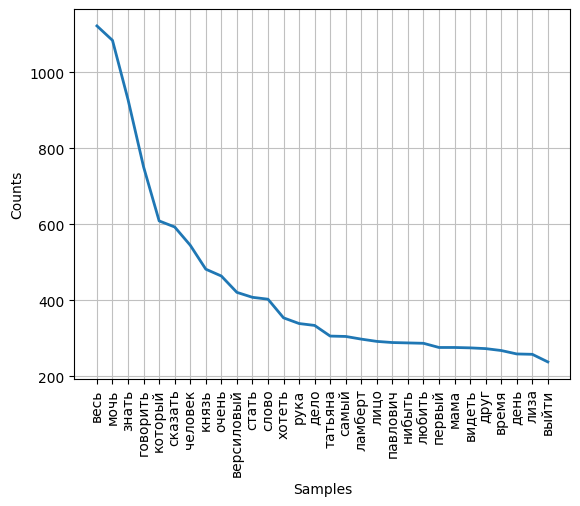

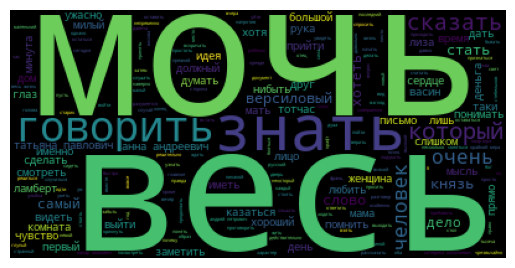

In [16]:
pod = read_file("podrostok.txt")
info_from_book(pod)

Counter({'NNP': 3777, 'NN': 26, 'JJ': 11, 'VBD': 10, 'CD': 10, 'VBZ': 2, 'VBP': 1, 'RB': 1})
{'JJ': 0.0028660760812923396, 'NNP': 0.9841063053673789, 'NN': 0.006774361646690985, 'VBP': 0.0002605523710265763, 'VBD': 0.0026055237102657635, 'CD': 0.0026055237102657635, 'VBZ': 0.0005211047420531526, 'RB': 0.0002605523710265763}
Лексическое разнообразие:  30.198019801980198
Средняя длина слова:  7.231233822260569
Средняя длина предложения:  15.522448979591836
Запятых на 1000 символов:  104.41426146010187
Двоеточий на 1000 символов:  3.1833616298811545
Дефис на 1000 символов:  0.0
Аналог-дефис на 1000 символов:  0.0
Тире на 1000 символов:  8.276740237691001
Точек с запятой на 1000 символов:  5.942275042444821
Двойных кавычек на 1000 символов:  0.4244482173174873
В тексте больше диалогов
Чаще всего встречаемые слова:  [('письмо', 30), ('дело', 22), ('иван', 20), ('жена', 20), ('петрович', 19)]


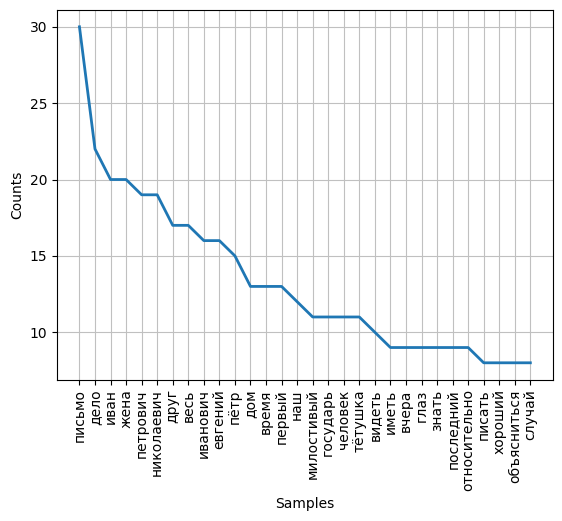

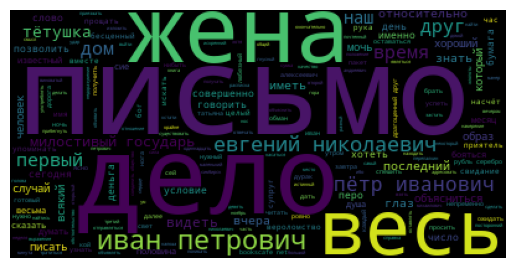

In [17]:
push = read_file("pushkin.txt")
info_from_book(push)

Анализ:
1) Я специально брала тексты разного формата и стиля, поэтому сравнивать их длину бесполезно или размер бесполезно. Однако на эмперическом уровне можно сделать вывод, что наиболее известные и значимые труды Достоевсокго были написаны в середине его авторского пути(1855-1872 годы).


2) Лексиечское разнообразие, судя по выбранным текстам, уменьшается, в "Двойник" - первом тексте - оно составляет 11.2, в стихотворении "На первое июля" ~ 43 (но это заслуга жанра, а не резкого писательского скачка), в остальных текстах данный показатель около 7-8.


3) Средняя длина слова - "Двойник" ~ 7.9, "На первое июля" ~ 6, "Преступление и наказание" ~ 8.1, "Бесы" ~ 8, "Подросток" ~ 8.09, "Пушкин" ~ 7.2. Исходя из данных можно сделать вывод, что длина слова практически не изменилась, она отличается лишь по жанру (стихотворение, письмо-речь приуроченная к смерти Пушкина). Таким образом этот показатель не репрезентативен для изучение изменений творчесвта Достоевского.


4) Средняя длина предложения - "Двойник" ~ 17.1, "На первое июля" ~ 15.6, "Преступление и наказание" ~ 12.9, "Бесы" ~ 14, "Подросток" ~ 16, "Пушкин" ~ 15. Итак, Достоевский начал с более длинных предложений (во втором тексте это опять же стилистическая особенность), в целом автор пришел к чуть более емким предложеням, однако исходя из списков и графиков чаще всего встречаемых слов можно сдлеать вывод, что структура предложений стала усложняться(Гипотеза1). Так, например, чаще стали встреться такеи слова как "который" - оно может выстпуать, как усложнение опредления или же как связующее слово в сложно-подчиненном предложении. Таким образом, структура предложений стала сложнений, но из-за этого они не стали нагруженней. Скорее всего появилось больше описаний. Проверю это.


5) Запятых на 1000 символов - "Двойник" ~ 123.8, "На первое июля" ~ 128.9, "Преступление и наказание" ~ 104, "Бесы" ~ 105.6, "Подросток" ~ 108.2, "Пушкин" ~ 104.4. Таким образом, кол-во запятых значительно уменьшилось. Значит следует 2 гипотезы: 1.1 - используются другие знаки препинания, 1.2 - упростилась структура предложения, стало больше описаний. Я проверила остальные знаки пунктуаци, из-за чего подтвердилась гипотеза 2: другие знаки конечно используются, но их стало меньше на 1000 слов. Кроме того, я проверяю два вида дефиса и тире, так как в стихотворном тексте оно введено в другом формате. 
Также чевидно, что "-"  является маркером пярмой речи во всех, текстах. Поэтому буду искать кавычки("), которые могут указать на размышления персонажа.


6) После проведенного мной анализа видно, что в каждрм тексте больше диалогов, чем размышлений персонажа. Но судя по словам маркерам из облака слов(хотеть, мочь, знать), монжо сделать вывод, что персонажи много мыслят, но это входит в основное тело текст, для этого не нужны кавычки, также они могут выделять один большой блок размышлений. Кроме того, в первых текстах таких кавычек и вовсе нет, тогда как позже они появляются и увеличивают синтаксическую сложность предложения и текста в целом. Однако в последних текстах кол-во кавычек сильно падает - перенос мысли в описательную часть текста + влияние жанра.


7) Вернемся к лексическому разнообразию, судя по статистике и графикам о чаще всего встречающимся словам, можно сдлеать вывод, что в раннем творчесвте разнообразие увеличивается за счет большого кол-ва персонажей, употребления разных имен. Скорее всего текст был сфокусирован на персонажах, а дейсвтий было меньше. Позже фокус сместился на сюжетность по дейсвтию (частые слова - не только имена, но и действия) и особенно на внутренний мир героя (слова маркеры "весь", "мочь", "знать", "хотеть" и тд). Я решила не перносить слова такеи как "весь" в переменную стоп слов, потому что из данного примера видно, что они довольно репрезентативны. 


8) Также я разобрала по частям речи, но наиболее примитивный токенизатор находит больше всего Имена Собственные, скорее всего он считает несколько раз употребленные в тексте одни и те же имена и тд, плюс полагаю, что он не достаточно точный, и может заносить обычные сущ-ые в данный список, просто потому что они не зафиксированы в словаре тэггера. Однако можно отметить, что моя теория подтвердилась. В первых текстах больше сущесвтительых + Имен Собсвенных. а с развитием творчесвта увеличивается база глаголов, разнообразие их форм(несколько тегов глаголов выявлено), кроме того динамика отслеживается и в том, что со временем в текстах появляюются иностранные слова и их становиться всёё больше.

8) Хочу провести измерение тональности текстов, но пока библиотеки не подхоядт для этого, а доуступный русскоязычный корпус сложно найти в открытом доступе.